<a href="https://colab.research.google.com/github/Damonaak/EDA_project/blob/main/Khushal_copy_of_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.

In [27]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [2]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing CSV from the drive and converting csv to pandas df
df = pd.read_csv('/content/drive/MyDrive/Copy of Telecom Churn.csv')


In [4]:
# Displaying 1st five rows
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.shape

(3333, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#**Data Overview of Dataset**

In [7]:
def initial_overview(dataset):
    
    '''
    This function allows to view initial overview of the data.
    Such as number of rows, features and feature labels, 
    is/are there any missing value/s in the data set?,
    unique values in the dataset


    '''
    print('Overview of the Dataset')

    #shape of the Dataset
    print('\n Shape:',df.shape)

    #Rows in the dataset
    print("Rows:", df.shape[0])

    #Column or Feature in the dataset
    print("\nNumber of features:", df.shape[1])
    print("\nFeatures:")
    print(df.columns.tolist())

    #missing value
    missing_value = df.isnull().sum().values.sum()

    if missing_value == 0:
      print('\n Missing Values: No Missing Values')
    else:
      print('\n Missing Values:', missing_value)

    #unique value

    print("\n Unique values:")
    print(df.nunique())

     #Data Type
    print("\n Datatype:")
    print(df.dtypes)

    #Describe
    print("\n Statistics:")
    print(df.describe().T)

In [8]:
initial_overview(df)

Overview of the Dataset

 Shape: (3333, 20)
Rows: 3333

Number of features: 20

Features:
['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']

 Missing Values: No Missing Values

 Unique values:
State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
T

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


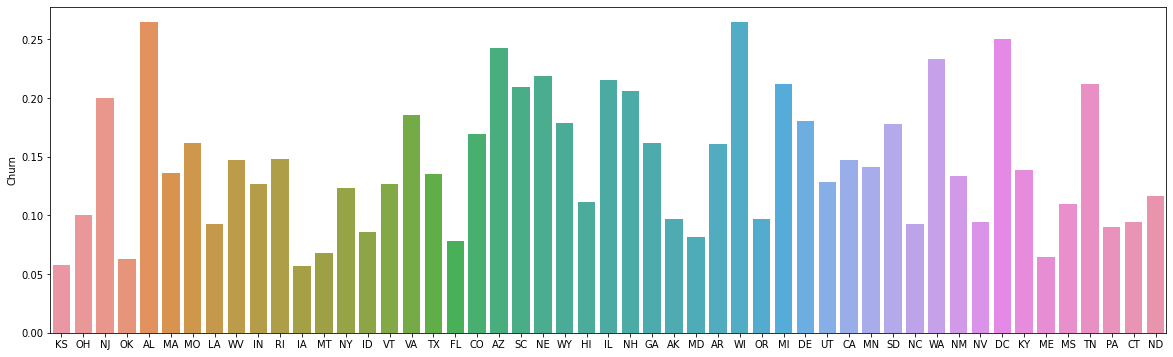

In [9]:
#plotiing state where churn rate is postive
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()
plt.figure(figsize=(20,6))
sns.barplot(s1,s2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


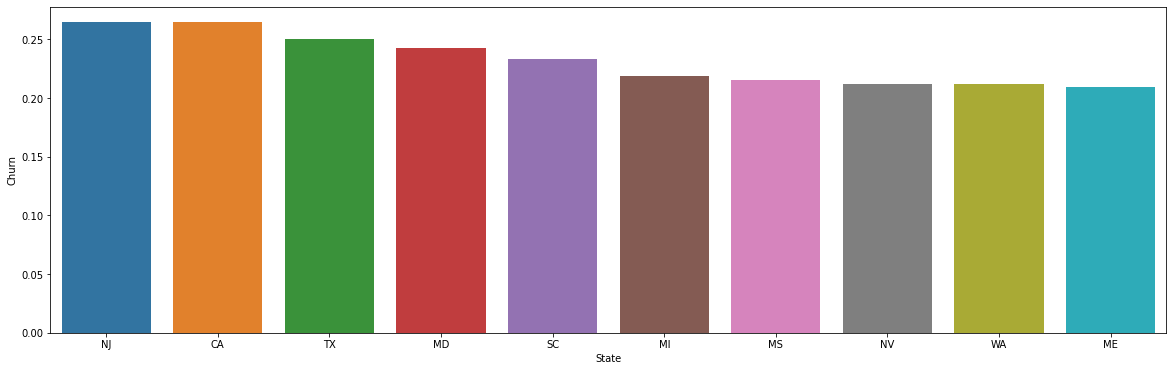

In [10]:
#Plotting top ten state where churn rate is high
top_ten = (df.groupby(['State'])['Churn']).mean().sort_values(ascending = False).head(10)

#creating index, because sns.barplot requires height variable
top_ten_index = (df.groupby(['State'])['Churn']).mean().sort_values(ascending = False).head(10).index

plt.figure(figsize=(20,6))
sns.barplot( top_ten_index, top_ten)

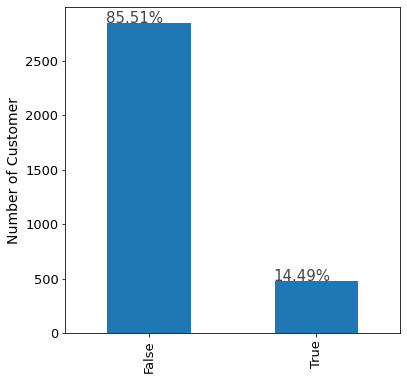

In [11]:
#Pecentage  plot (countplot) of Churn rate
ax = df["Churn"].value_counts().plot(kind='bar', figsize=(6, 6), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

#**Chi Square Test**
As in our dataset we have 3 categorical features, namely 'States', 'Voice Mail Plan' and 'International Plan' have catagories State names, Yes and No. As the correlation matrix only interpret the numerical data and tells us the correlation with the other feature, it will not tell us the relationship between the categorical fetaures. Thus, we are using chi2-test to evaluate the catagircal feature relation with churn. Hypothesis: Before applying chi2 test we will have two hyposthesis.

Null Hypothesis H0: that the features has no relation with Churn

Alternative Hypothesis Ha: that the feature has relation with Churn

 



*  If the p-value is less than 0.05 or 5% ,accept the Ha and reject the H0

*  If the p-value is greater tham 0.05 or 5%, accept the H0 and reject Ha


#**Chi2 test State and Churn**

In [12]:
#@title Chi2 test State and Churn
from scipy.stats import chi2_contingency
  
# creating  the cross table with pandas cross tab 
dataset_table=pd.crosstab(df['State'],df['Churn'])


#degree of freedom (dof) is [number of col -1]*[number of rows - 1]
#p is p-value at 5%
stat, p, dof, expected = chi2_contingency(dataset_table)  
  
# interpret p-value 
# alpha is confidance interval of 95%, means considering the all the variance value under 95% of the variance distibution
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.002296221552011188
Dependent (reject H0)


In [13]:
#@title Chi2 test Voice mail plan and Churn

# creating  the cross table with pandas cross tab 
dataset_table=pd.crosstab(df['Voice mail plan'],df['Churn'])

#degree of freedom (dof) is [number of col -1]*[number of rows - 1]
#p is p-value at 5%
stat, p, dof, expected = chi2_contingency(dataset_table)  
  
# interpret p-value 
# alpha is confidance interval of 95%, means considering the all the variance value under 95% of the variance distibution
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')


p value is 5.15063965903898e-09
Dependent (reject H0)


In [14]:
#@title Chi2 test International plan and Churn

# creating  the cross table with pandas cross tab 
dataset_table=pd.crosstab(df['International plan'],df['Churn'])

#degree of freedom (dof) is [number of col -1]*[number of rows - 1]
#p is p-value at 5%
stat, p, dof, expected = chi2_contingency(dataset_table)  
  
# interpret p-value 
# alpha is confidance interval of 95%, means considering the all the variance value under 95% of the variance distibution
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.4931077033159556e-50
Dependent (reject H0)


**From the above, we can conclude that all three feature has significant relation with churn.**

*From the chi2-test we have found that there is relation for categorical features with chur. We will use binary encoding to convert 'Yes', 'No', 'True' and 'False' to '1' and '0'. It will make sense wihile comparing two data and with the correlation matrix*

In [15]:
#Encoding
df["Int_Churn"] = df["Churn"].astype(int)
df["Int_Voice_mail_plan"] = df["Voice mail plan"].map({'Yes': 1, 'No': 0})
df["Int_International_plan"] = df["International plan"].map({'Yes': 1, 'No': 0})

#State Encoding
#Creating key from pd.Series and stored in key variable
key= pd.Series(df['State'])
#converting it into set for unique values or 'Key' of the state
key = set(key)
#Converting it into list
key= list(key)
len(key)

#For encoding each state will have number from 1 to 51
value =[]
for i in range (1,52, 1):
  
  value.append(i)

#Converting valuse list into dictonary

State_Dict = {key[i]: value[i] for i in range(len(key))}

df["Int_State"] = df["State"].map(State_Dict)

In [16]:
#Filtering the data with respect to positive churn (Churn = True)
df[df['Churn']==True].T

,10,15,21,33,41,48,54,57,69,76,...,3268,3272,3280,3287,3291,3301,3304,3320,3322,3323
State,IN,NY,CO,AZ,MD,ID,WY,CO,TX,DC,...,WA,MD,AR,KS,MI,CA,IL,GA,MD,IN
Account length,65,161,77,12,135,119,87,121,150,82,...,84,133,76,170,119,84,71,122,62,117
Area code,415,415,408,408,408,415,415,408,510,415,...,415,510,408,415,510,415,510,510,408,415
International plan,No,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,Yes,No,No
Voice mail plan,No,No,No,No,Yes,No,No,Yes,No,No,...,No,No,No,Yes,Yes,No,No,No,No,No
Number vmail messages,0,0,0,0,41,0,0,30,0,0,...,0,0,0,42,22,0,0,0,0,0
Total day minutes,129.1,332.9,62.4,249.6,173.1,159.1,151.0,198.4,178.9,300.3,...,289.1,295.0,107.3,199.5,172.1,280.0,186.1,140.0,321.1,118.4
Total day calls,137,67,89,118,85,114,83,129,101,109,...,100,141,140,119,119,113,114,101,105,126
Total day charge,21.95,56.59,10.61,42.43,29.43,27.05,25.67,33.73,30.41,51.05,...,49.15,50.15,18.24,33.92,29.26,47.6,31.64,23.8,54.59,20.13
Total eve minutes,228.5,317.8,169.9,252.4,203.9,231.3,219.7,75.3,169.1,181.0,...,233.8,223.6,238.2,135.0,223.6,202.2,198.6,196.4,265.5,249.3


#**Correlation Matrix of the Telecom Churn Data**

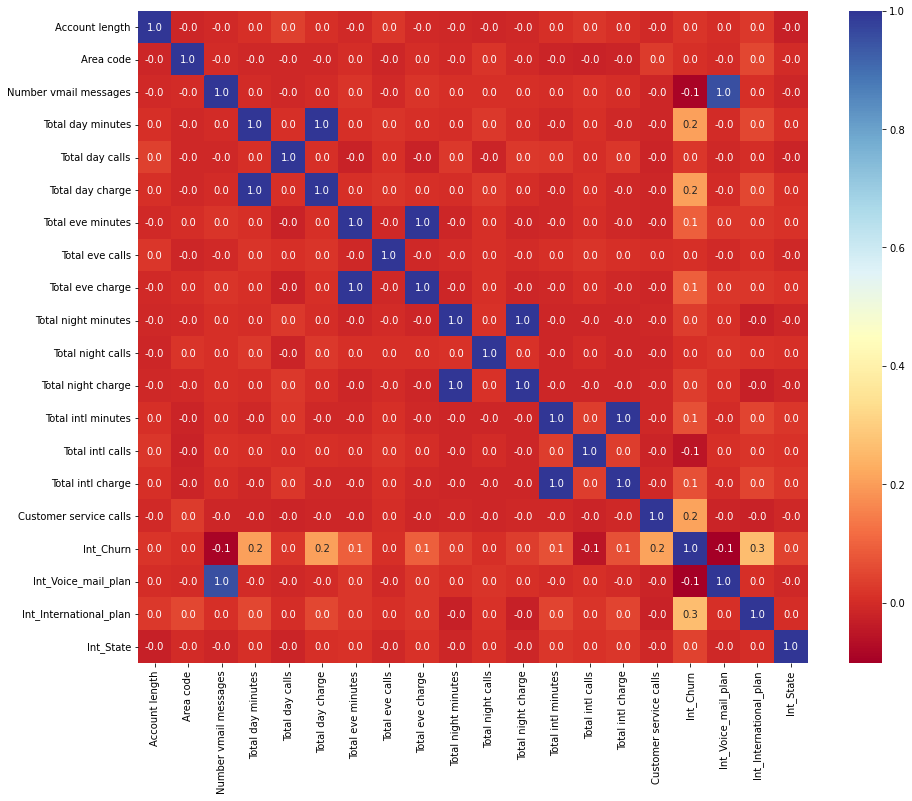

In [17]:
#plotting Telecom Churn Correlation Matrix
#creating copy of the orignal dataframe befor dropping the 'Churn' feature
df1 = df.copy()

df1 = df1.drop('Churn', axis = 1) 

plt.figure(figsize = (15, 12))
sns.heatmap(df1.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

From the above Correlation Matrix:

* International Plan (int) has postive correlation of 0.3 with Churn

* Total Day Charges and Minutes and Customer Service calls have postive correlation of 0.2 with Churn  

* Total Evening Minute and Charges, Total Intl Minute and Charges have 0.1 Correlation with churn





In [28]:
def df_scattr(x_coordinate,y_coordinate,dataframe,title_of_x_coordinate,title_of_y_coordinate,hue, size_x,size_y): 
    '''
    This function takes x and y coordinate as an input to Seaborn scatter plot.
    dataframe - pandas working DataFrame
    title_of_x_coordinate - title of x coordinate
    title_of_y_coordinate - title of y coordinate
    hue - in the sns catterplot you can comapare the x and y with respect to boolean 1-0 or true or false.
    size_x,size_y - X and y coordinate plot size
    '''
    plt.figure(figsize=(size_x,size_y))
    sns.scatterplot(x_coordinate,y_coordinate, data=dataframe,hue=hue).set(title=f'{title_of_x_coordinate} and {title_of_y_coordinate} Scatter Plot')
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



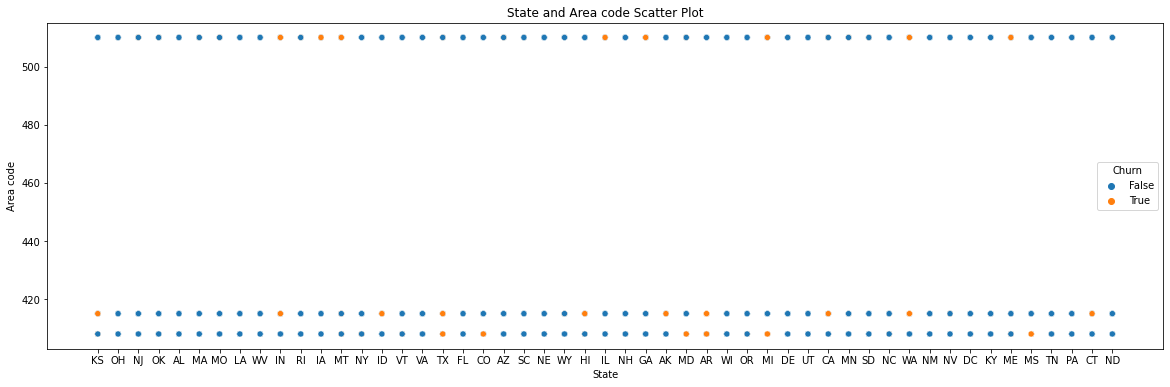

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



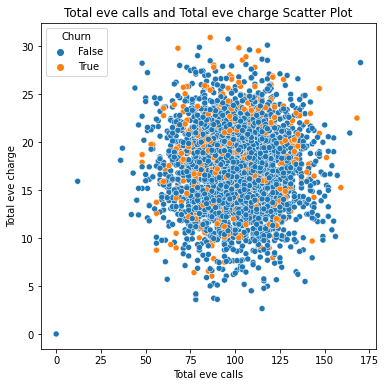

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



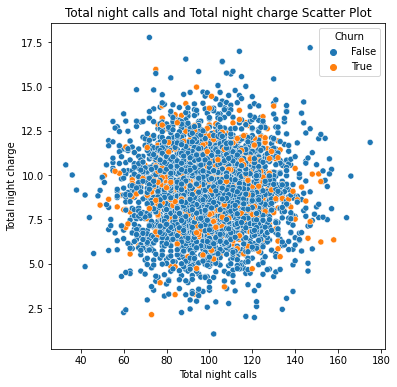

In [29]:
#plots of State, Area code, Total day/eve/night calls with respect to churn using df_scattr function
df_scattr(df['State'],df['Area code'],df, 'State', 'Area code' , 'Churn', 20,6)
df_scattr(df['Total eve calls'], df['Total eve charge'], df, 'Total eve calls', 'Total eve charge' , 'Churn', 6,6)
df_scattr(df['Total night calls'], df['Total night charge'], df, 'Total night calls', 'Total night charge' , 'Churn', 6,6)

Dropping Features

From the above correlation matrix, features 'State', "Account lenght", 'Area code', 'Total day calls', 'Total eve calls', 'Total night calls' has no significant correlation with the Churn. Thus, dropping thsese features from the dataset.

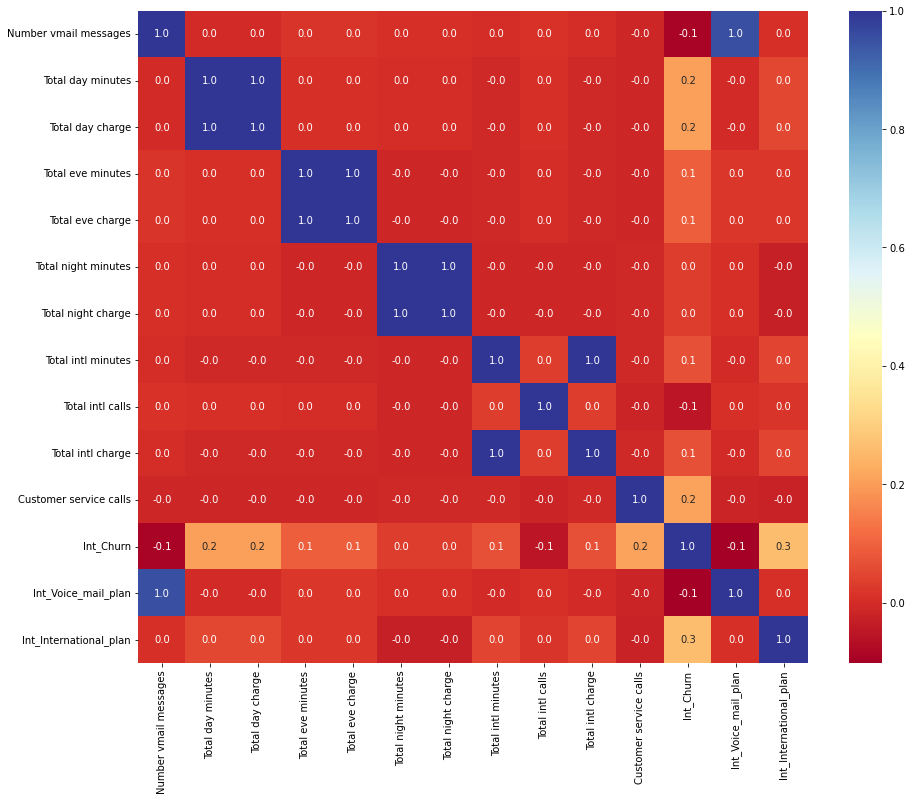

In [18]:
df1 = df1.drop(['State' , 'Int_State',"Account length", 'Area code', 'Total day calls', 'Total eve calls', 'Total night calls'], axis = 1)

plt.figure(figsize = (15, 12))
sns.heatmap(df1.corr(), cmap="RdYlBu", annot=True, fmt=".1f")
plt.show()

Box Plot

Here, we dropping the columns/feature which has yes-no or 1-0 values to simplify the box plot.

Creating new df_numerical dataframe excluding these features : 'International plan', 'Voice mail plan', 'Number vmail messages', 'Int_Churn', 'Int_International_plan', 'Int_Voice_mail_plan'

In [19]:
#only considering numerical data

df_numerical = df1.drop([ 'International plan', 'Voice mail plan', 'Number vmail messages', 'Int_Churn', 'Int_International_plan', 'Int_Voice_mail_plan'], axis = 1)
df_numerical.columns

Index(['Total day minutes', 'Total day charge', 'Total eve minutes',
       'Total eve charge', 'Total night minutes', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

#**Plotting Box plot with Plotly**

In [20]:
import plotly.graph_objs as go
import plotly
plot = []

def gen_boxplot(df_numerical):
    for feature in df_numerical:
        plot.append(go.Box(name = feature,y = df_numerical[feature]))
        
gen_boxplot(df_numerical)
plotly.offline.iplot(plot)

**In the above box plot, we can see the spread of Minutes and charges. We will do further analysis on Call minutes and Charges.**

#**Statistics of Call Minutes and Call Charges**

In [21]:
#@title Average and Standard Deviation

#Call Minutes
avg_day_call_min = round(df1['Total day minutes'].mean(), 2)
std_day_call_min  = round(df1['Total day minutes'].std(), 2)

avg_eve_call_min  = round(df1['Total eve minutes'].mean(), 2)
std_eve_call_min  = round(df1['Total eve minutes'].std(), 2)

avg_night_call_min  = round(df1['Total night minutes'].mean(), 2)
std_night_call_min  = round(df1['Total night minutes'].std(), 2)

#Call Charge
avg_day_call_charge = round(df1['Total day charge'].mean(), 2)
std_day_call_charge  = round(df1['Total day charge'].std(), 2)

avg_eve_call_charge  = round(df1['Total eve charge'].mean(), 2)
std_eve_call_charge  = round(df1['Total eve charge'].std(), 2)

avg_night_call_charge  = round(df1['Total night charge'].mean(), 2)
std_night_call_charge  = round(df1['Total night charge'].std(), 2)

print('Call Minutes Summary:')
print(f'Average Total Day Call Minuites are {avg_day_call_min} with Standard Deviation of {std_day_call_min} ')
print(f'Average Total Evening Call Minuites are {avg_eve_call_min} with Standard Deviation of {std_eve_call_min} ')
print(f'Average Total Night Call Minuites are {avg_night_call_min} with Standard Deviation of {std_night_call_min} ')

print('Call Charges Summary:')
print(f'Average Total Day Call Charge are {avg_day_call_charge} with Standard Deviation of {std_day_call_charge} ')
print(f'Average Total Evening Call Charge are {avg_eve_call_charge} with Standard Deviation of {std_eve_call_charge} ')
print(f'Average Total Night Call Charge are {avg_night_call_charge} with Standard Deviation of {std_night_call_charge} ')

Call Minutes Summary:
Average Total Day Call Minuites are 179.78 with Standard Deviation of 54.47 
Average Total Evening Call Minuites are 200.98 with Standard Deviation of 50.71 
Average Total Night Call Minuites are 200.87 with Standard Deviation of 50.57 
Call Charges Summary:
Average Total Day Call Charge are 30.56 with Standard Deviation of 9.26 
Average Total Evening Call Charge are 17.08 with Standard Deviation of 4.31 
Average Total Night Call Charge are 9.04 with Standard Deviation of 2.28 


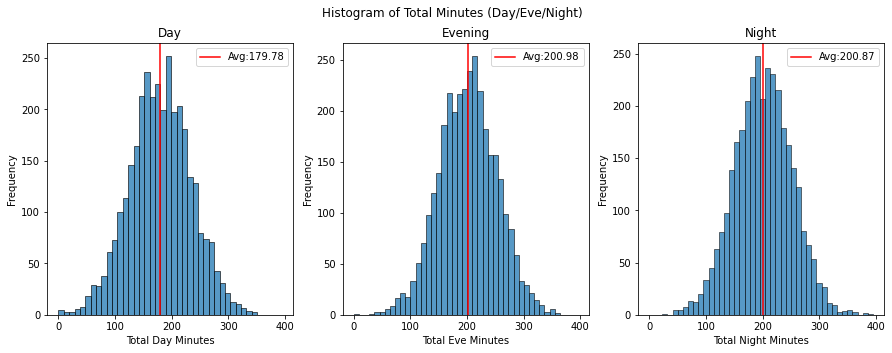

In [22]:
#@title Call Minutes Histogram Plot

#define plotting region (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Histogram of Total Minutes (Day/Eve/Night)')

#title of each subplot
axes[0].set_title('Day')
axes[1].set_title('Evening')
axes[2].set_title('Night' )

# X and Y label
axes[0].set_xlabel('Total Day Minutes')
axes[0].set_ylabel('Frequency')

axes[1].set_xlabel('Total Eve Minutes')
axes[1].set_ylabel('Frequency')

axes[2].set_xlabel('Total Night Minutes')
axes[2].set_ylabel('Frequency')

#vertical average line
axes[0].axvline(avg_day_call_min, color = 'r', label = 'Avg:'+str(avg_day_call_min) )
axes[1].axvline(avg_eve_call_min, color = 'r', label = 'Avg:'+str(avg_eve_call_min) )
axes[2].axvline(avg_night_call_min, color = 'r',label = 'Avg:'+str(avg_night_call_min) )

#create histogram in each subplot
sns.histplot(df1['Total day minutes'], ax=axes[0])
sns.histplot(df1['Total eve minutes'], ax=axes[1])
sns.histplot(df1['Total night minutes'], ax=axes[2])

#plot legend of each subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()

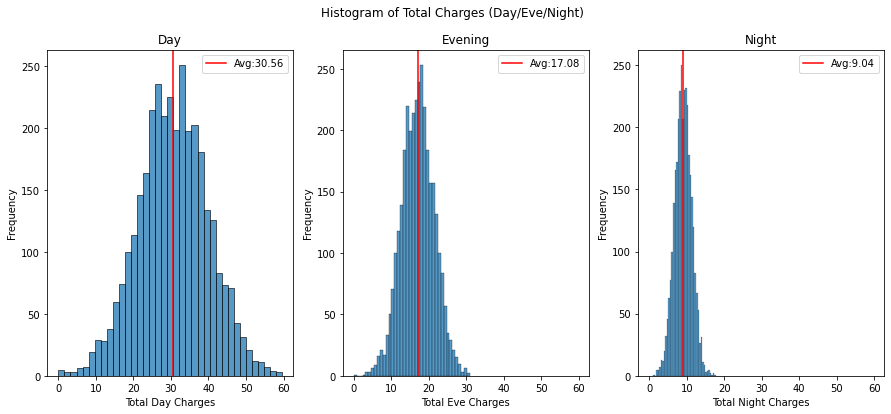

In [30]:
#@title Call Charges Histogram Plot

#define plotting region (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,6))
fig.suptitle('Histogram of Total Charges (Day/Eve/Night)')

#title of each subplot
axes[0].set_title('Day')
axes[1].set_title('Evening')
axes[2].set_title('Night' )

# X and Y label
axes[0].set_xlabel('Total Day Charges')
axes[0].set_ylabel('Frequency')

axes[1].set_xlabel('Total Eve Charges')
axes[1].set_ylabel('Frequency')

axes[2].set_xlabel('Total Night Charges')
axes[2].set_ylabel('Frequency')

#vertical average line
axes[0].axvline(avg_day_call_charge, color = 'r', label = 'Avg:'+str(avg_day_call_charge) )
axes[1].axvline(avg_eve_call_charge, color = 'r', label = 'Avg:'+str(avg_eve_call_charge) )
axes[2].axvline(avg_night_call_charge, color = 'r',label = 'Avg:'+str(avg_night_call_charge) )

#create histogram in each subplot
sns.histplot(df1['Total day charge'], ax=axes[0])
sns.histplot(df1['Total eve charge'], ax=axes[1])
sns.histplot(df1['Total night charge'], ax=axes[2])

#plot legend of each subplot
axes[0].legend()
axes[1].legend()
axes[2].legend()

**Scatterplot of important features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



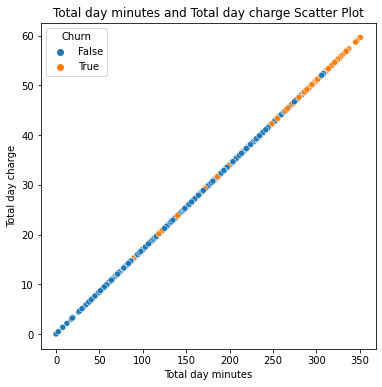

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



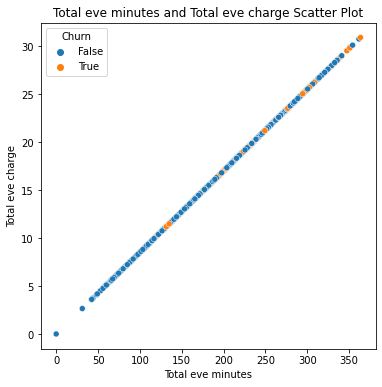

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



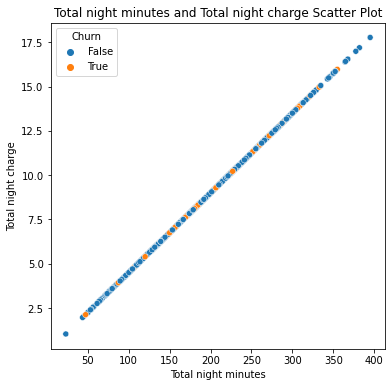

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



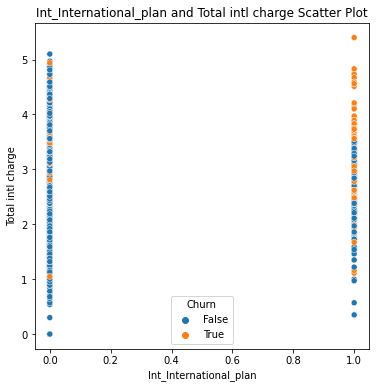

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



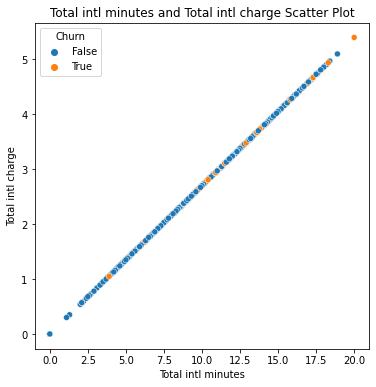

In [31]:
df_scattr(df['Total day minutes'],df['Total day charge'],df, 'Total day minutes', 'Total day charge' , 'Churn', 6,6)
df_scattr(df['Total eve minutes'],df['Total eve charge'],df, 'Total eve minutes', 'Total eve charge' , 'Churn', 6,6)
df_scattr(df['Total night minutes'],df['Total night charge'],df, 'Total night minutes', 'Total night charge' , 'Churn', 6,6)
df_scattr(df['Int_International_plan'],df['Total intl charge'],df, 'Int_International_plan', 'Total intl charge' , 'Churn', 6,6)
df_scattr(df['Total intl minutes'],df['Total intl charge'],df, 'Total intl minutes', 'Total intl charge' , 'Churn', 6,6)


**Scatter Plot Evaluation (Subpllot wise)**

As the total day minutes increase, the total day charges also increase, which is leading to churn. We can see a direct relationship between high charges and higher minutes with a high churn rate.

As the total Eve minutes increase, the total Evening charges also increase. We can see a direct relationship between high charges and higher minutes with a high churn rate.

As the total night minutes increase, the total night charges also increase. However, one cannot evaluate the relationship with Churn. As churn data spread throughout the minutes interval

Customers who have opted for the international plan and are showing a significant churn rate with an increase in charges compared to other customers are not using this service.

As the total international minutes increase, the total international charges also increase. However, one cannot evaluate the relationship with Churn. As churn data spread throughout the international minutes interval

In [24]:
#@title Box plot of  Day, Evening, Night and International plan Charges
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.box(df, y="Total day charge", x="Churn", color="Churn",notched=True,   title="Box plot of total bill", )

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Box(  x=df["Churn"], y=df["Total day charge"], name='Total day charge'),row=1, col=1)
fig.add_trace(go.Box(  x=df["Churn"], y=df["Total eve charge"],name='Total eve charge'),row=1, col=2)
fig.add_trace(go.Box(  x=df["Churn"], y=df["Total eve charge"],name='Total night charge'),row=1, col=3)
fig.add_trace(go.Box(  x=df["Churn"], y=df["Total intl charge"],name='Total intl charge'),row=1, col=4)

fig.update_layout(height=600, width=1800, title_text="Sub Plot of Call Charges (Day/Eve/Nigth) w.r.t. Churn")
fig.show()



Box Plot Evaluation: In the above 4-subplot, we can interpret that the Median price of the Positive Churn (Churn = True) is higher than that of the Negative Churn values (Churn = False)

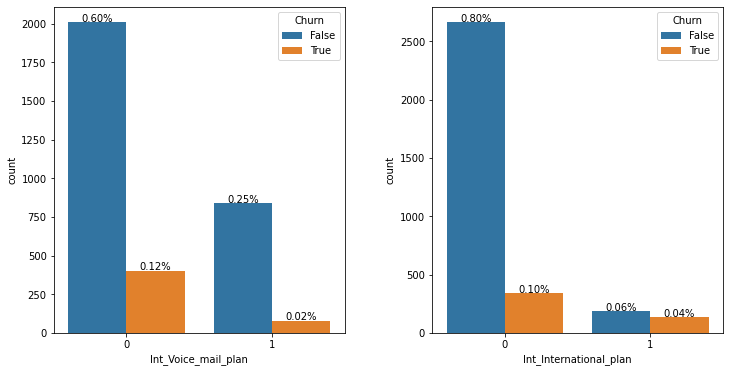

In [25]:
_, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace = 0.3)
ax = sns.countplot(data = df, x = "Int_Voice_mail_plan", hue = "Churn", ax = axs[0])
ax1 = sns.countplot(data = df, x = "Int_International_plan", hue = "Churn", ax = axs[1])

for p in ax.patches:
        height = p.get_height() 
        ax.text(p.get_x()+p.get_width()/2, height + 3.4,"{:1.2f}%".format(height/len(df),0),ha = "center", rotation = 0) 
        
for p in ax1.patches:
        height = p.get_height() 
        ax1.text(p.get_x()+p.get_width()/2,height + 3.4,"{:1.2f}%".format(height/len(df),0),ha = "center", rotation = 0 ) 

Interpretation of Count Plot: In the above count-subplot, The customer who has not opted for the Voice Mail plan has high churn rate compared with the customer who did not. On the other hand, customer who has opted for international plan has high churn rate compared to who did not.

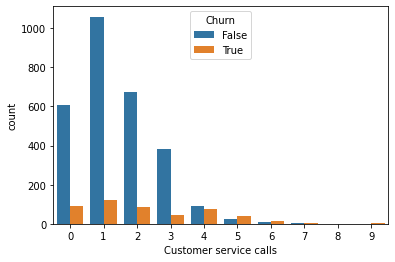

In [26]:
# Contplot of Customer Serice calls grouped by churn  
plt.plot(figsize=(12, 6))
sns.countplot(x="Customer service calls", hue='Churn', data=df)

According to the countplot above, the churn rate starts to significantly rise after 4 contacts to the service centre. Customers who have phoned customer service three times or less are far less likely to leave than those who have called four or more times.

**Conclusion:** 


Let's take a look at some of the knowledge we have learned about the churn data set by doing exploratory data analysis.



*   Linear functions of the minute fields make up the four charge fields (Day, Evening,Night and International plan).
*   From the correlation matrix, features 'State', "Account lenght", 'Area code', 'Total day calls', 'Total eve calls', 'Total night calls' has no significant correlation with the Churn

*   We can keep all of the remaining features in the dataset because they significant correlation with churn and other features.


Findings with respect to churn:


*   Customers with a high number of day and evening minutes churn at a higher rate than other customers.
*   Customers on the International Plan churn at a higher rate.

*   Customers who have made four or more customer service calls churn four times as frequently as other customers.











**Recommendations to Client**

Orange S.A. must focus on the charges and its customer service department. As a result, customers who call for longer periods of time pay more charges.


*   Clients may introduce an unlimited minutes pack or service by paying optimal or a set premium upfront. This will allow the client to retain its customer without having to pay a higher premium for a greater number of minutes.

*   The client may introduce special international plans or add some additional benefits to the normal plan, giving it a few international minutes. This will attract customers. similar with the voice mail plan.
*   The client must focus on customer service by setting a pragmatic goal of "no more than three calls per customer" or solving customer queries in less than three calls by providing proper training to the customer service team.


*   Among the states there are states with a high churn rate clients can carry out surveys, why do these problems occur?








